In [2]:
import pandas_datareader as pdr

In [10]:
df = pdr.get_data_tiingo('GOOG', api_key=key)
import warnings
warnings.filterwarnings("ignore")

In [11]:
df.to_csv('GOOG.csv')

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('GOOG.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2019-02-26 00:00:00+00:00,1115.13,1119.5100,1099.92,1105.75,1471743,55.7565,55.9755,54.9960,55.2875,29434860,0.0,1.0
1,GOOG,2019-02-27 00:00:00+00:00,1116.05,1117.9800,1101.00,1106.95,968760,55.8025,55.8990,55.0500,55.3475,19375200,0.0,1.0
2,GOOG,2019-02-28 00:00:00+00:00,1119.92,1127.6500,1111.01,1111.30,1542609,55.9960,56.3825,55.5505,55.5650,30852180,0.0,1.0
3,GOOG,2019-03-01 00:00:00+00:00,1140.99,1142.9700,1124.75,1124.90,1450316,57.0495,57.1485,56.2375,56.2450,29006320,0.0,1.0
4,GOOG,2019-03-04 00:00:00+00:00,1147.80,1158.2800,1130.69,1146.99,1446047,57.3900,57.9140,56.5345,57.3495,28920940,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2024-02-16 00:00:00+00:00,141.76,144.4800,141.52,144.21,21865118,141.7600,144.4800,141.5200,144.2100,21865118,0.0,1.0
1254,GOOG,2024-02-20 00:00:00+00:00,142.20,143.3285,140.80,140.94,18625589,142.2000,143.3285,140.8000,140.9400,18625589,0.0,1.0
1255,GOOG,2024-02-21 00:00:00+00:00,143.84,143.9800,141.91,142.64,16499584,143.8400,143.9800,141.9100,142.6400,16499584,0.0,1.0
1256,GOOG,2024-02-22 00:00:00+00:00,145.32,146.2000,144.01,146.12,23024707,145.3200,146.2000,144.0100,146.1200,23024707,0.0,1.0


In [14]:
df1 = df.reset_index()['close']

In [15]:
df.shape

(1258, 14)

In [16]:
df[1228:].head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1228,GOOG,2024-01-11 00:00:00+00:00,143.67,146.660,142.2150,144.895,17471130,143.67,146.660,142.2150,144.895,17471130,0.0,1.0
1229,GOOG,2024-01-12 00:00:00+00:00,144.24,144.740,143.3600,144.340,13998729,144.24,144.740,143.3600,144.340,13998729,0.0,1.0
1230,GOOG,2024-01-16 00:00:00+00:00,144.08,145.840,143.0564,143.430,19198939,144.08,145.840,143.0564,143.430,19198939,0.0,1.0
1231,GOOG,2024-01-17 00:00:00+00:00,142.89,143.410,140.5100,142.910,17884548,142.89,143.410,140.5100,142.910,17884548,0.0,1.0
1232,GOOG,2024-01-18 00:00:00+00:00,144.99,145.585,143.3500,143.440,18876800,144.99,145.585,143.3500,143.440,18876800,0.0,1.0


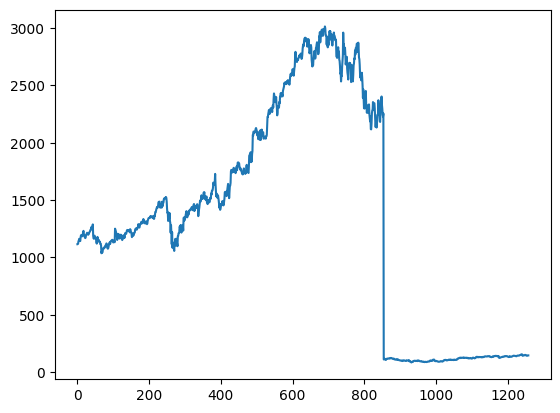

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to the scale of the data , so we apply MiniMax scaler

In [18]:
import numpy as np

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1.shape

(1258, 1)

In [21]:
df1

array([[0.35201267],
       [0.35232659],
       [0.35364709],
       ...,
       [0.02059242],
       [0.02109742],
       [0.02108718]])

                           SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [22]:
from sklearn.model_selection import train_test_split
training_set = int(len(df1)*0.65)
test_set = len(df1) - training_set
train_data , test_data = df1[0:training_set,:] , df1[training_set:len(df1):]

In [23]:
import numpy 
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [24]:
time_step = 100
X_train , y_train = create_dataset(train_data , time_step)
X_test , y_test = create_dataset(test_data , time_step)

In [25]:
print(X_train.shape) , print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [26]:
print(X_test.shape) , print(y_test.shape)

(340, 100)
(340,)


(None, None)

X_train =X_train.reshape(X_train.shape[0] , X_train.shape[1],1)
X_test =X_test.reshape(X_test.shape[0] , X_test.shape[1],1)

                                         STACK LSTM MODEL

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model = Sequential()
model.add(LSTM(50,return_sequences = True , input_shape=(100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

                                          OPTIMIZERS

SGD(stochastic gradient descent) : update model weights based on the gradients of the loss function 


Adam : combination of both ADAGRAD and RMSprop


RMSprop : utilizes the moving average of squared gradients for normalizing the gradient descent 

Adadelta : extension of AdaGrad that adapts learning rates based on a fixed-size window of previous gradient updates.


Adamax: A variant of Adam based on the infinity norm.

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100

12/12 [==============================] - 22s 649ms/step - loss: 0.1562 - val_loss: 0.0261
Epoch 2/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0197 - val_loss: 0.0386
Epoch 3/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0101 - val_loss: 0.0181
Epoch 4/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0051 - val_loss: 0.0122
Epoch 5/100
12/12 [==============================] - 4s 338ms/step - loss: 0.0025 - val_loss: 0.0064
Epoch 6/100
12/12 [==============================] - 3s 275ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 7/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 8/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 9/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 10/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0012 - val_

Epoch 76/100
12/12 [==============================] - 2s 188ms/step - loss: 5.1528e-04 - val_loss: 1.8962e-04
Epoch 77/100
12/12 [==============================] - 2s 179ms/step - loss: 6.0053e-04 - val_loss: 3.4651e-04
Epoch 78/100
12/12 [==============================] - 2s 198ms/step - loss: 6.8875e-04 - val_loss: 2.4577e-04
Epoch 79/100
12/12 [==============================] - 2s 205ms/step - loss: 6.6127e-04 - val_loss: 2.3352e-04
Epoch 80/100
12/12 [==============================] - 2s 201ms/step - loss: 5.3138e-04 - val_loss: 2.5983e-04
Epoch 81/100
12/12 [==============================] - 3s 269ms/step - loss: 5.4529e-04 - val_loss: 1.7340e-04
Epoch 82/100
12/12 [==============================] - 3s 218ms/step - loss: 6.7801e-04 - val_loss: 2.8569e-04
Epoch 83/100
12/12 [==============================] - 3s 233ms/step - loss: 5.6726e-04 - val_loss: 2.4803e-04
Epoch 84/100
12/12 [==============================] - 3s 233ms/step - loss: 5.1113e-04 - val_loss: 2.7717e-04
Epoch 85/1

In [31]:
import tensorflow as tf

In [32]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 63ms/step


In [33]:
# transform the data present to its original form - reverse sacling of the data present

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


ROOT MEAN SQUARED PERFORMANCE MATRIX

In [35]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train , train_predict))

2024.7165536421007

In [36]:
math.sqrt(mean_squared_error(y_test , test_predict))

172.38037574840575

                                              PLOT

Blue - The original data of the dataset

Yellow - Training dataset

Green - Test dataset


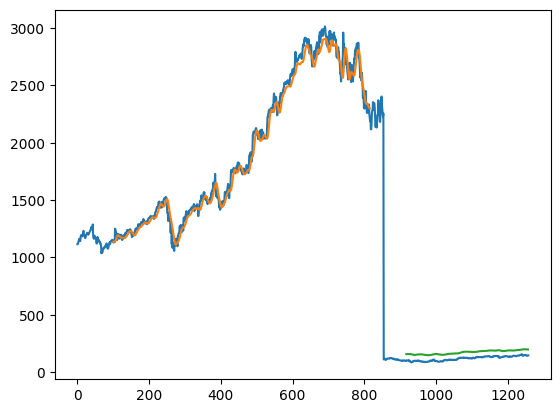

In [37]:
look_back = 100


trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:] = np.nan
testPredictPlot = np.empty_like(df1)
testPredictPlot[:] = np.nan


trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1) - 1, :] = test_predict


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [38]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
x_input = test_data[341:].reshape(1,-1)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
temp_input

[0.01763407252217054,
 0.01699599752959201,
 0.018009410753099104,
 0.01791387011249911,
 0.01884880352408477,
 0.019111540285734755,
 0.01900917531366333,
 0.019862216747591862,
 0.01938110137885617,
 0.01879762103804906,
 0.019449344693570455,
 0.019619952980356164,
 0.019036472639549048,
 0.018934107667477617,
 0.018169782542677666,
 0.018565593768020503,
 0.019323094561349032,
 0.01473373164681355,
 0.013631602114177886,
 0.013617953451235034,
 0.01441981239912785,
 0.014266264941020717,
 0.015040826563027816,
 0.015385455302334951,
 0.01599623296902777,
 0.01636474686848489,
 0.01668890261337774,
 0.016982348866649146,
 0.016446638846142034,
 0.01725532212550628,
 0.01711201116460628,
 0.017722788831299113,
 0.018046944576191954,
 0.018838567026877622,
 0.018238025857391944,
 0.018572418099491925,
 0.01881126970099192,
 0.019288972903991893,
 0.01867478307156335,
 0.01861677625405621,
 0.01881126970099192,
 0.018053768907663383,
 0.017207551805206275,
 0.017002821861063434,
 0.016

In [50]:
from numpy import array

def predict_stock_prices(model, initial_input, time_steps=100, prediction_days=30):
    lst_output = []
    temp_input = initial_input  # Assuming initial_input contains the stock data
    n_steps = time_steps
    i = 0
    
    while i < prediction_days:
        if len(temp_input) > time_steps:
            x_input = array(temp_input[1:]).reshape(1, -1, 1)
        else:
            x_input = temp_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        temp_input = np.append(temp_input, yhat[0])
        lst_output.extend(yhat.tolist())
        i += 1
    
    return lst_output

# Example usage
# Assuming 'model' is your trained model and 'stock_data' is the initial stock data
# predicted_prices = predict_stock_prices(model, stock_data, time_steps, prediction_days)


In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [52]:
len(df1)

1258

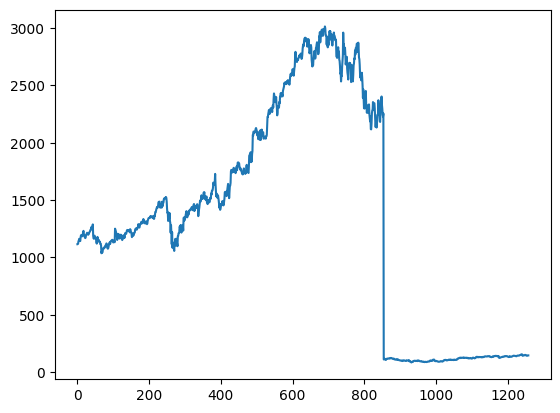

In [49]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)